In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import Normalizer
from sklearn import datasets
from sklearn.preprocessing import normalize
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
import seaborn as sns
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

In [ ]:
!pip3 install uci-dataset
from sklearn import datasets
import uci_dataset as dataset
!git clone https://github.com/tanmay-pro/sampleData.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Cloning into 'sampleData'...
remote: Enumerating objects: 11648, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 11648 (delta 5), reused 21 (delta 4), pack-reused 11626
Receiving objects: 100% (11648/11648), 171.48 MiB | 22.26 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Checking out files: 100% (11644/11644), done.


In [ ]:
#one per cluster
def getK(trainX):
  model = KMeans()
  visualizer = KElbowVisualizer(model, k=(2,50), timings=False)
  visualizer.fit(trainX)        # Fit the data to the visualizer
  visualizer.show()        # Finalize and render the figure
  kAtElbow = visualizer.elbow_value_
  return kAtElbow

def getValidk(trainX):
  loo = LeaveOneOut()
  loo.get_n_splits(trainX)
  validK = []
  for train_index, test_index in loo.split(trainX):
    trainData, testData = trainX[train_index], trainX[test_index]
    trainLabel, testLabel = trainY[train_index], trainY[test_index]
    validSampleK = []
    for k in range(2, 10):
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(trainData, trainLabel)
        predicted = model.predict(testData)
        if predicted == testLabel:   
            validSampleK.append(k)
    validK.append(validSampleK)
  validK = np.array(validK, dtype=object)
  return validK

def getPreTrainedModels(trainX, trainY):
  trainedModels = []
  for i in range(2, 10):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(trainX, trainY)
    trainedModels.append(model)
  return trainedModels    

def k_one_per_cluster(trainX, trainY, testX, testY):
    bestK = getK(trainX)
    kmeans = KMeans(n_clusters=bestK, random_state=0).fit(trainX)
    labels = kmeans.labels_
    k_for_each_cluster = {}
    for i in np.unique(labels):
      k_for_each_cluster[i] = [0 for i in range(2,10)]
    validK = getValidk(trainX) 
    for i in range(len(validK)):
      for j in range(len(validK[i])):
        k_for_each_cluster[labels[i]][validK[i][j]-2] += 1
    k_assigned_for_each_cluster = {}
    for i in np.unique(labels):
      k_assigned_for_each_cluster[i] = np.argmax(k_for_each_cluster[i])+2
    return k_assigned_for_each_cluster, labels , kmeans

def localKNNonepercluster(trainX,testX, trainY, testY):
  unique_k =set()
  models = getPreTrainedModels(trainX, trainY)
  k_assigned_for_each_cluster, labels ,kmeans = k_one_per_cluster(trainX, trainY, testX, testY)
  predicted = []
  predictedKFrequency = [0]*10
  for key in k_assigned_for_each_cluster:
    predictedKFrequency[k_assigned_for_each_cluster[key]] += 1
  for i in range(0, len(testX)):
    cluster_predicted = kmeans.predict(testX[i].reshape(1, -1))
    bestk = k_assigned_for_each_cluster[cluster_predicted[0]]
    unique_k.add(bestk)
    model = models[bestk-2]
    predicted.append(model.predict(testX[i].reshape(1, -1)))
  return predicted, metrics.accuracy_score(testY, predicted), predictedKFrequency,statistics.mean(unique_k) 

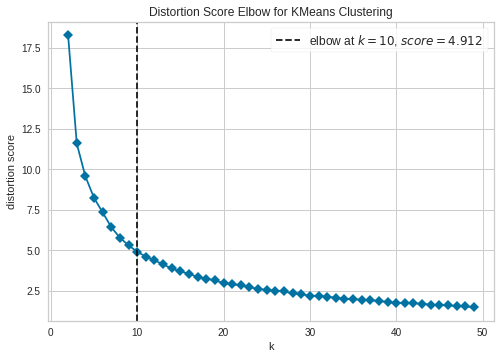

The corresponding accuracy is 0.7297297297297297


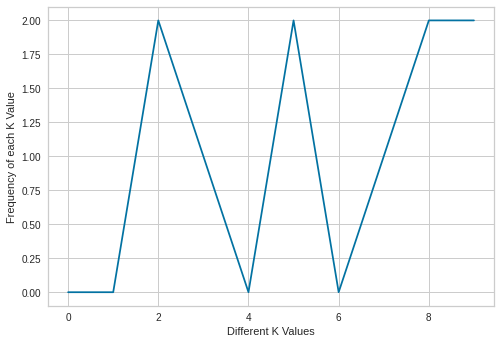

In [ ]:
seedsFile = '/content/sampleData/modifiedDatasets/seeds.csv'
df = pd.read_csv(seedsFile)
data = np.array(df)
Y = data[:,data.shape[1]-1]
# Y = np.reshape(Y, (len(Y),1))
X = np.delete(data, data.shape[1]-1, 1)
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2, random_state=42)
normalized_x_train = normalize(trainX)
normalized_x_test = normalize(testX)

predicted, accuracyScore, predictedKFrequency,meank = localKNNonepercluster(normalized_x_train, normalized_x_test, trainY, testY)
print("The corresponding accuracy is", accuracyScore)
print("unique mean k is  ",meank)
plt.plot(predictedKFrequency)
plt.xlabel("Different K Values")
plt.ylabel("Frequency of each K Value")
plt.show()

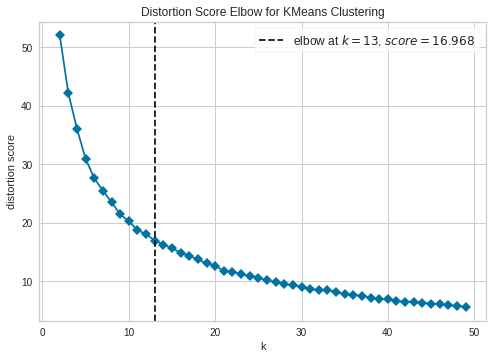

The corresponding accuracy is 0.5125


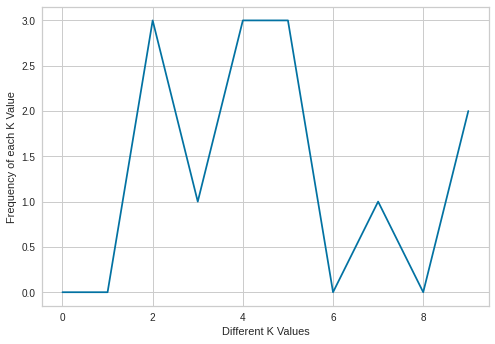

In [ ]:
transfusionFile = '/content/sampleData/modifiedDatasets/transfusion.csv'
df = pd.read_csv(transfusionFile)
data = np.array(df)
Y = data[:,data.shape[1]-1]
# Y = np.reshape(Y, (len(Y),1))
X = np.delete(data, data.shape[1]-1, 1)
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2, random_state=42)
normalized_x_train = normalize(trainX)
normalized_x_test = normalize(testX)

predicted, accuracyScore, predictedKFrequency,meank = localKNNonepercluster(normalized_x_train, normalized_x_test, trainY, testY)
print("The corresponding accuracy is", accuracyScore)
print("unique mean k is  ",meank)
plt.plot(predictedKFrequency)
plt.xlabel("Different K Values")
plt.ylabel("Frequency of each K Value")
plt.show()

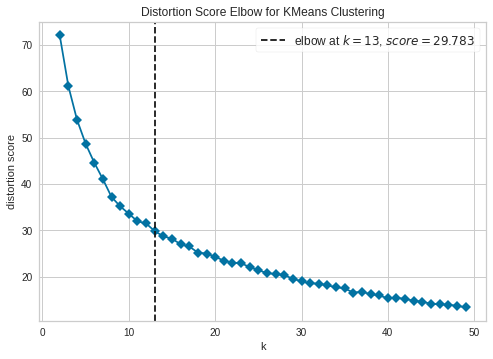

The corresponding accuracy is 0.5735294117647058


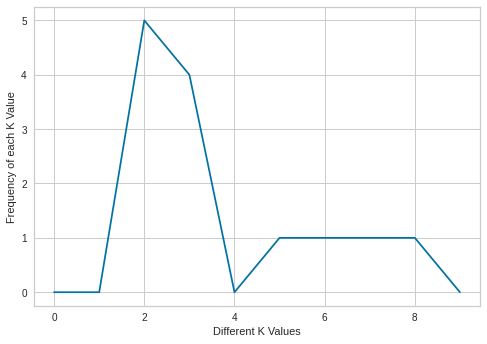

In [ ]:
soybeanFile = '/content/sampleData/modifiedDatasets/soybeans.csv'
df = pd.read_csv(soybeanFile)
data = np.array(df)
Y = data[:,data.shape[1]-1]
# Y = np.reshape(Y, (len(Y),1))
X = np.delete(data, data.shape[1]-1, 1)
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2, random_state=42)
normalized_x_train = normalize(trainX)
normalized_x_test = normalize(testX)

predicted, accuracyScore, predictedKFrequency,meank = localKNNonepercluster(normalized_x_train, normalized_x_test, trainY, testY)
print("The corresponding accuracy is", accuracyScore)
print("unique k mean is  ",meank)
plt.plot(predictedKFrequency)
plt.xlabel("Different K Values")
plt.ylabel("Frequency of each K Value")
plt.show()


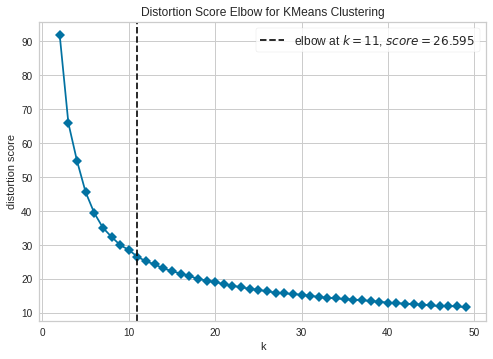

The corresponding accuracy is 0.8244725738396624


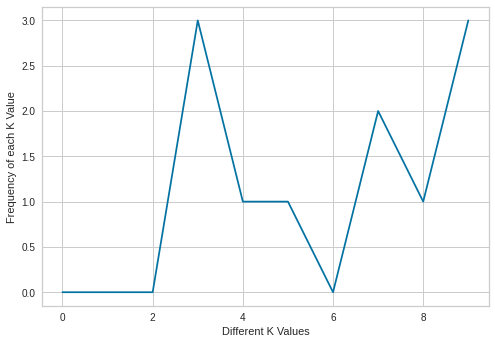

In [ ]:
immunoFile = '/content/sampleData/modifiedDatasets/Immuno.csv'
df = pd.read_csv(immunoFile)
data = np.array(df)
Y = data[:,data.shape[1]-1]
# Y = np.reshape(Y, (len(Y),1))
X = np.delete(data, data.shape[1]-1, 1)
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2, random_state=42)
normalized_x_train = normalize(trainX)
normalized_x_test = normalize(testX)

predicted, accuracyScore, predictedKFrequency,meank = localKNNonepercluster(normalized_x_train, normalized_x_test, trainY, testY)
print("The corresponding accuracy is", accuracyScore)
print("unique k mean is  ",meank)
plt.plot(predictedKFrequency)
plt.xlabel("Different K Values")
plt.ylabel("Frequency of each K Value")
plt.show()